### Reading the CSV file 

In [1]:
import pandas as pd
df=pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### EDA

In [2]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [3]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


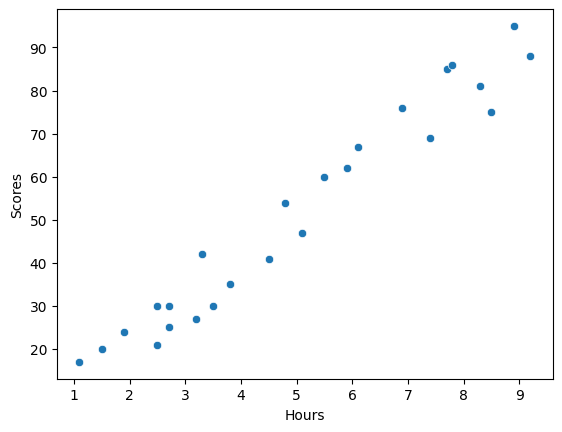

In [4]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
sns.scatterplot(df,x='Hours',y='Scores');

In [5]:
df.Scores.corr(df.Hours)

0.9761906560220887

### Model fitting

In [6]:
!pip install statsmodels
!pip install scikit-learn
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
X=sm.add_constant(df['Hours'])
y=df['Scores']
model=sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           9.13e-17
Time:                        09:33:47   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plotting Residuals

In [11]:
df['predicted']=model.predict()
df['residuals']=model.resid
df.head()

,Hours,Scores,predicted,residuals
0,2.5,21,26.923182,-5.923182
1,5.1,47,52.340271,-5.340271
2,3.2,27,33.766244,-6.766244
3,8.5,75,85.578002,-10.578002
4,3.5,30,36.698985,-6.698985


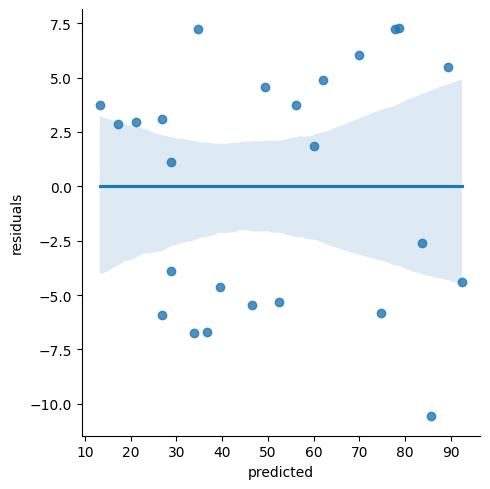

In [12]:
import seaborn as sns
sns.lmplot(df,x='predicted',y='residuals')
sns.despine()

### Making predictions

In [9]:
model.predict([1,9.5])

array([95.35380562])